# Regression Linear Vs KNN Housing Data

## Imports - Inspection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing and checking data frame
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
# creating an empty data frame for model features
features = pd.DataFrame()

In [6]:
# adding features to empty frame
features = df[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']]

In [7]:
# inspecting new df
features.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


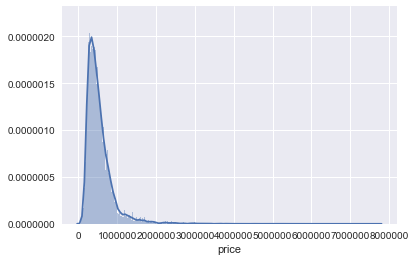

In [8]:
# see how target feature is distributed
sns.distplot(features['price'], bins=500)

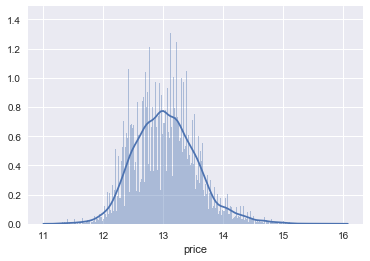

In [9]:
# using log to change distribution
sns.distplot(np.log(features['price']), bins=500)

In [10]:
# checking for outliers
features.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [11]:
# removing low end outliers
features = features[features['price'] > 110000]

In [12]:
# removing high outliers
features = features[features['price'] < 1600000]

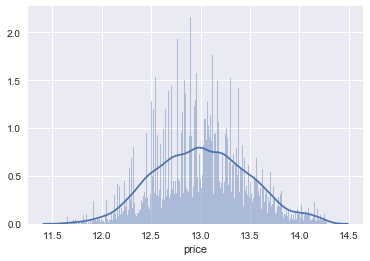

In [13]:
# checking distribution
sns.distplot(np.log(features['price']), bins=500)

## Features

In [14]:
# creating new feature for distribution
features['price_log'] = np.log(features['price'])

In [15]:
# feature selection
# importing statsmodels for p-values
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# setting up formula
linear_formula = 'price ~ price_log+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+sqft_living15+sqft_lot15'

# fitting model
lm = smf.ols(formula=linear_formula, data=features).fit()


print('\n Coeff: \n', lm.params)
print('\n P-Values: \n', lm.pvalues)
print('\n nR-squared:', lm.rsquared)


 Coeff: 
 Intercept        1.948351e+06
price_log        4.586343e+05
bedrooms        -7.554077e+03
bathrooms       -2.408627e+03
sqft_living      1.671835e+01
sqft_lot        -3.845051e-02
floors          -7.123613e+03
waterfront       3.698407e+04
view             1.561720e+04
condition        1.488527e+03
grade            1.598941e+04
sqft_above       1.483553e+01
sqft_basement    1.882616e+00
yr_built        -5.278144e+02
yr_renovated     5.779809e+00
zipcode         -6.649201e+01
sqft_living15    5.000017e-02
sqft_lot15      -1.164342e-01
dtype: float64

 P-Values: 
 Intercept        6.244456e-02
price_log        0.000000e+00
bedrooms         4.870385e-28
bathrooms        4.270173e-02
sqft_living      6.244173e-81
sqft_lot         2.838233e-02
floors           5.221691e-08
waterfront       4.842850e-06
view             8.175523e-86
condition        7.864103e-02
grade            2.240110e-82
sqft_above       3.256988e-71
sqft_basement    5.385406e-02
yr_built         2.504051e-87


In [16]:
# removing features with P-Value greater than 5

In [17]:
# running smf.ols with new new list of features
linear_formula = 'price ~ price_log+sqft_lot+floors+view+grade+sqft_basement+yr_built+yr_renovated+zipcode+sqft_living15+sqft_lot15'

# fitting model
lm = smf.ols(formula=linear_formula, data=features).fit()


print('\n Coeff: \n', lm.params)
print('\n P-Values: \n', lm.pvalues)
print('\n nR-squared:', lm.rsquared)


 Coeff: 
 Intercept        2.740979e+06
price_log        4.637106e+05
sqft_lot        -1.202670e-02
floors          -1.669988e+03
view             1.643187e+04
grade            2.136812e+04
sqft_basement    1.807526e+00
yr_built        -5.273058e+02
yr_renovated     7.106443e+00
zipcode         -7.566436e+01
sqft_living15    1.253474e+01
sqft_lot15      -7.245473e-02
dtype: float64

 P-Values: 
 Intercept         8.456949e-03
price_log         0.000000e+00
sqft_lot          4.973682e-01
floors            1.760082e-01
view             8.446233e-103
grade            1.071728e-155
sqft_basement     1.784837e-01
yr_built         1.528160e-104
yr_renovated      7.726240e-08
zipcode           5.339664e-13
sqft_living15     1.640686e-27
sqft_lot15        7.108357e-03
dtype: float64

 nR-squared: 0.919870915434


In [18]:
# removing features with P-Values greater than 5

In [19]:
# running new list of features
linear_formula = 'price ~ price_log+grade+yr_renovated+sqft_living15+sqft_lot15'

# fitting model
lm = smf.ols(formula=linear_formula, data=features).fit()


print('\n Coeff: \n', lm.params)
print('\n P-Values: \n', lm.pvalues)
print('\n nR-squared:', lm.rsquared)


 Coeff: 
 Intercept       -5.871034e+06
price_log        4.809090e+05
grade            1.147624e+04
yr_renovated     1.591303e+01
sqft_living15    1.424408e+01
sqft_lot15      -6.202848e-02
dtype: float64

 P-Values: 
 Intercept        0.000000e+00
price_log        0.000000e+00
grade            2.194086e-57
yr_renovated     1.887708e-33
sqft_living15    4.121907e-36
sqft_lot15       1.541805e-03
dtype: float64

 nR-squared: 0.915246273148


In [20]:
# looks like we have the most important features for our linear model

## Creating Linear Regression Model

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.feature_selection import RFE

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# Using the features from our P-value testing 
X = features[['price_log','grade','yr_renovated','sqft_living15','sqft_lot15']]

In [23]:
# setting target value as price
y = features['price']

In [24]:
# spliting our data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [25]:
# setting instant for model
lm = LinearRegression()

In [26]:
# fitting model with our training data
model = lm.fit(X_train,y_train)

In [27]:
# checking model score
model.score(X_test, y_test)

0.91615502176078223

In [28]:
# cross validating model with 5 folds
cross_validate(model, X, y, cv=5)

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([ 0.00500011,  0.00500059,  0.00600052,  0.00500083,  0.00500107]),
 'score_time': array([ 0.00099993,  0.00099969,  0.0010004 ,  0.00100064,  0.00099969]),
 'test_score': array([ 0.91644628,  0.91504256,  0.91419934,  0.914645  ,  0.91316311]),
 'train_score': array([ 0.91490023,  0.91526796,  0.91548011,  0.91535569,  0.91539318])}

In [29]:
# getting test scores
cross_val_score(lm.fit(X_train,y_train), X, y,cv= 5)

array([ 0.91644628,  0.91504256,  0.91419934,  0.914645  ,  0.91316311])

### Scores

So far we have been able to get a fairly accurate model averaging about 91% accuracy.  Also our scores are very steady this imply that our model is not over fitting.  Next, lets see if we can reduce the components in our model using PCA

## PCA

In [30]:
# scaling and transforming X training data
ss = StandardScaler().fit_transform(X_train)

In [31]:
# using pca to select 4 components from our 5 remaining features
sklearn_pca = PCA(n_components=4)

# fitting our x training data to pca
Y_sklearn = sklearn_pca.fit_transform(ss)

# adding results to a new data frame
X_PCA = pd.DataFrame(Y_sklearn)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.46617057  0.20391449  0.19240977  0.08010839]


In [32]:
# creating a new model using our reduced components
model2 = lm.fit(X_PCA, y_train)

In [33]:
# checking model score still about 90
model2.score(X_PCA, y_train)

0.89836939291197282

In [34]:
# cross validating our new model over 5 folds of data
cross_validate(model2, X, y,cv= 5)

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([ 0.00400162,  0.00400066,  0.00600052,  0.00400043,  0.00400043]),
 'score_time': array([ 0.00099897,  0.0010004 ,  0.00100231,  0.        ,  0.        ]),
 'test_score': array([ 0.91644628,  0.91504256,  0.91419934,  0.914645  ,  0.91316311]),
 'train_score': array([ 0.91490023,  0.91526796,  0.91548011,  0.91535569,  0.91539318])}

In [35]:
cross_val_score(model2, X, y,cv= 5)

array([ 0.91644628,  0.91504256,  0.91419934,  0.914645  ,  0.91316311])

### Analysis of Linear Regression

   After applying PCA we were able to predict our new Y values with better accuracy than before while reduce the number of dimensions in our model. Improving our models efficiency. Now lets take a look at this dataset using KNN regression. The mark to beat is 92% accuracy

## KNN Regression

In [36]:
# grabbing neighbors model
from sklearn import neighbors

In [37]:
# creating a new scaler
scaler = StandardScaler()

In [38]:
# fitting scaler minus our price column
scaler.fit(features.drop('price',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
# creating an array of transformed values
scaled_features = scaler.transform(features.drop('price',axis=1))

In [40]:
# Saving new array as a data frame
df_feat = pd.DataFrame(scaled_features,columns=features.columns[1:])

In [41]:
# double check new df
df_feat.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price_log
0,-0.386685,-1.480067,-1.023494,-0.228318,-0.905075,-0.064685,-0.289704,-0.630790,-0.548568,-0.742868,-0.660907,-0.545597,-0.204394,1.869526,-0.949678,-0.261106,-1.489196
1,-0.386685,0.222012,0.647090,-0.188531,0.951670,-0.064685,-0.289704,-0.630790,-0.548568,0.545427,0.280791,-0.682209,4.880307,0.876122,-0.413448,-0.186204,0.369829
2,-1.474142,-1.480067,-1.516257,-0.119604,-0.905075,-0.064685,-0.289704,-0.630790,-1.455688,-1.276405,-0.660907,-1.296963,-0.204394,-0.941994,1.164601,-0.170274,-1.928473
3,0.700771,1.243259,-0.086044,-0.244563,-0.905075,-0.064685,-0.289704,2.454145,-0.548568,-0.912038,1.481455,-0.204067,-0.204394,1.082301,-0.919037,-0.285584,0.612728
4,-0.386685,-0.118404,-0.422565,-0.167588,-0.905075,-0.064685,-0.289704,-0.630790,0.358553,-0.092214,-0.660907,0.547298,-0.204394,-0.079795,-0.244918,-0.191325,0.257637


In [42]:
# setting our new transformed data to our X variable, 
# why transform the data?
# Transformed data can be treated as a distance
X = df_feat

# setting our target as price
y = features['price']

# splitting data into test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [43]:
# setting up knn regression model, using the 5 nearest neighbors weighted by distance
knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')

In [44]:
# training our model with our training data
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [45]:
# creating a list of our models predictions
pred = knn.predict(X_test)

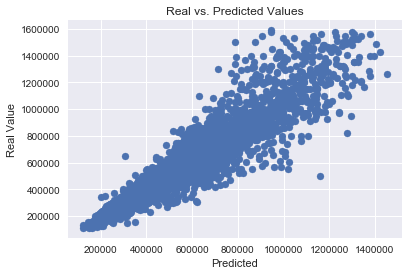

In [46]:
# can veiw our predictions against actual values
plt.scatter(pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Real Value')
plt.title('Real vs. Predicted Values')
plt.show()

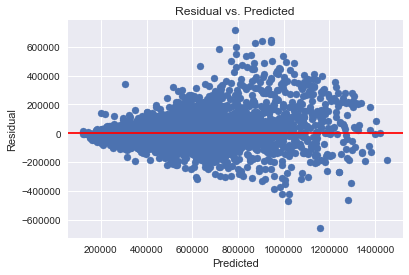

In [47]:
# another scatter to see how our predictions looked
plt.scatter(pred,y_test - pred)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0,c='red')
plt.title('Residual vs. Predicted')
plt.show()

It is worth noting that our models residuals are slightly off more in one direction

In [48]:
# using cross validation to check our model with 5 folds
cross_validate(knn.fit(X_train, y_train), X, y,cv= 5)

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([ 0.17680168,  0.14522648,  0.12933111,  0.20232868,  0.14852738]),
 'score_time': array([ 1.72433496,  1.74076247,  1.72421741,  1.81523395,  1.67226076]),
 'test_score': array([ 0.90902371,  0.90078636,  0.90039825,  0.90208593,  0.89540196]),
 'train_score': array([ 1.,  1.,  1.,  1.,  1.])}

In [54]:
# printing model scores
cross_val_score(knn.fit(X_train, y_train), X, y,cv= 5)

array([ 0.90902371,  0.90078636,  0.90039825,  0.90208593,  0.89540196])

This KNN model is hitting about 90% accuracy, but does start to decline a little in the last test I dont think it is a large enough drop to be concerned with over fitting.  Lets go ahead and see if we can get a little more preformance out of our model by checking for a more efficient K value.

In [63]:
# creating open list to store average error values
error_rate = []

# checking k values 1 - 40 stepping by 1
for i in range(1,40):
    
    # calling model to fit with i as neighbors
    knn = neighbors.KNeighborsRegressor(n_neighbors=i,weights='distance')
    # fitting model with new i values
    knn.fit(X_train, y_train)
    # saving i's predictions
    pred_i = knn.predict(X_test)
    # calculating the mean of each i's pred vs test values
    error_rate.append(np.mean(pred_i - y_test))

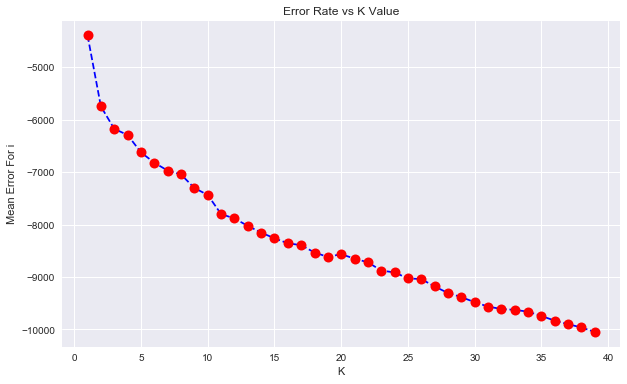

In [64]:
plt.figure(figsize=(10,6))
# set X range for the 40 values from our for loop, Y value is our mean error for each i
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Mean Error For i')
plt.show()

from this plot it looks like our best K value will be 1 lets test it out and see

In [83]:
knn = neighbors.KNeighborsRegressor(n_neighbors=1, weights='distance')

In [84]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='distance')

In [85]:
cross_validate(knn.fit(X_train, y_train), X, y,cv= 5)

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([ 0.17026639,  0.13644242,  0.15232038,  0.19518542,  0.15556931]),
 'score_time': array([ 1.33314252,  1.3754437 ,  1.36891818,  1.40545678,  1.23355556]),
 'test_score': array([ 0.85322771,  0.83637853,  0.848104  ,  0.84324499,  0.84549038]),
 'train_score': array([ 1.,  1.,  1.,  1.,  1.])}

In [86]:
cross_val_score(knn.fit(X_train, y_train), X, y,cv= 5)

array([ 0.85322771,  0.83637853,  0.848104  ,  0.84324499,  0.84549038])

Even though the mean error is much low using 1 as the K-Value, our models score is quiet a bit worse.  

## Conclusion

After creating a linear regression model and a KNN regression model for this housing data we can see many similarities and differences between the model.  Both models ended up with around 90% accuracy. The regression model ended at about 92% accuracy while the knn model end around 89% accuracy.  They both had increasing error margins as the housing prices when up.  However, for housing data I think our linear regression model is better suited for this type of data.  Where our KNN model would do better on a dataset that implemented its clustering ability better.  When testing the data with our KNN model it really doesn't help to add more neighbor after a K-value of 5, and even at a K-value of 5 our mean error increased to about 7000 verus 4600 or so at a K-value of 1. 